<a href="https://colab.research.google.com/github/greeshmaunni1990/PyTorch-For-ML-DL/blob/main/02_pytorch_classification_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neural Network classifcation with PyTorch

Classification is the problem of predicting as of to which category somthing is put.

### Make Classification data

In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles

# make 1000 samples

n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"Sample of X is : {X[:5]}")
print(f"Sample of y is : {y[:5]}")

Sample of X is : [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Sample of y is : [1 1 1 1 0]


In [6]:
# Make data frame of circle data

import pandas as pd

# Created data frame by creating a dictionary with first column as X1 and
# second column as X2
# label as y
circles = pd.DataFrame({'X1': X[:, 0],
                        'X2' : X[:, 1],
                        'label': y})


In [7]:
circles[:10]

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


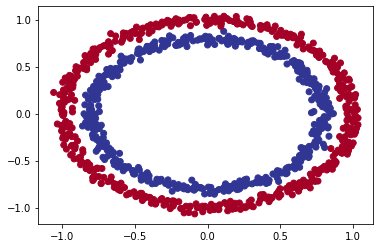

In [8]:
# Visualize

import matplotlib.pyplot as plt

plt.scatter(x=circles['X1'], y = circles['X2'],
            c=y, cmap=plt.cm.RdYlBu)


The data we are working on is called toy dataset, a dataset that is small enough to experiment but sizeable enough to practize the fundamentals

Check input and output shape

In [9]:
X.shape , y.shape

((1000, 2), (1000,))

In [10]:
# First example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Value of sample X is : {X_sample} and y is : {y_sample}")

# since y is a scalar it does not have any shape. Hence the result is showing ()
print(f"Value of shape of sample X is : {X_sample.shape} and shape of y is : {y_sample.shape}")

Value of sample X is : [0.75424625 0.23148074] and y is : 1
Value of shape of sample X is : (2,) and shape of y is : ()


### Turn data to tensors and create train and test splits

In [11]:
import torch
torch.__version__

'1.13.1+cu116'

In [12]:
type(X)

numpy.ndarray

In [13]:
type(y)

numpy.ndarray

In [14]:
# Turn data to tensors
# Here the X is already in tensor and y is in numpy.
# So we have to change the y to tensor using the following method:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [15]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

In [16]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [17]:
# Here the type of X is float64. So we convert it to float32
# X = X.type(torch.float32)

In [18]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [19]:
# torch.manual_seed(42)

In [20]:
# split data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [21]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

###Building a model

Do the following:

1. Set the device in agonistic code so our code will run on accelarator(GPU)if there is one.

2. Construct a model(by subclassing nn.Mode)

3. Define a loss function and optimizer

4. Create a training and test loop


In [22]:
import torch
from torch import nn

# set device agnostic code
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [23]:
X_train.shape

torch.Size([800, 2])

After setting device agnostic code, create a model that:

1. Subclass `nn.Module`

2. Create 2 `nn.Linear()` layer that is capable of handling the shapes of data

3. Defines a `forward()` method that does forward pass/forward computation of the model.

4. Instantiate an instance of model class and send it to target device

In [24]:
# 1. Construct a model that subclass nn.Model

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 nn.Linear Layers that handles shape of data
    # here in_features = 2 because the input has 2 features
    self.layer_1 = nn.Linear(in_features=2, out_features=5)

    # here the output of the previous layer will be given as the input layer 
    # of the present layer
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  # 3. Define forward method
  def forward(self, x):
    # here x is given as the input to layer one and layer one is given as the 
    # input of layer two which thereby will give the output
    return self.layer_2(self.layer_1(x)) # x -> layer 1 -> layer 2 -> output

  # 4. Instantiate the model device and send it to the target device
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
# to check if model parameters are on cuda
# next(model_0.parameters()).device

In [26]:
# replicate the above model using nn.Sequential
model_0 = nn.Sequential(nn.Linear(in_features=2, out_features=5),
                        nn.Linear(in_features=5, out_features=1)).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [27]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[ 0.5383, -0.6299],
                      [-0.5253,  0.3388],
                      [-0.5729,  0.6519],
                      [ 0.1856, -0.0666],
                      [-0.5919,  0.1004]])),
             ('0.bias', tensor([-0.1846,  0.1720,  0.3001,  0.2616, -0.5380])),
             ('1.weight',
              tensor([[-0.0361, -0.3773, -0.2220, -0.2308, -0.2956]])),
             ('1.bias', tensor([0.3991]))])

In [28]:
# convert X_test to tensor
# X_test = torch.from_numpy(X_test).to(device)
# X_test
# X_test = X_test.type(torch.float32)
print(X_test.dtype)

torch.float32


In [29]:
# make some predictions 
with torch.inference_mode():
  untrained_pred = model_0(X_test.to(device))
print(f"Length if predictions {len(untrained_pred)} and shape is {untrained_pred.shape}")
print(f"Length of test samples {len(X_test)} and shape is {X_test.shape}")
print(f"First 10 predictions are {untrained_pred[:10]}")
print(f"First 10 labels are {y_test[:10]}")

Length if predictions 200 and shape is torch.Size([200, 1])
Length of test samples 200 and shape is torch.Size([200, 2])
First 10 predictions are tensor([[ 0.0282],
        [ 0.1260],
        [ 0.1481],
        [-0.0074],
        [ 0.7457],
        [ 0.8008],
        [ 0.6027],
        [ 0.7623],
        [ 0.1227],
        [ 0.1392]])
First 10 labels are tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


#### Loss function and Optimizer

###### Loss Function
* For Regresssion use MAE or MSE for loss function

* For classification use binary cross entropy(`nn.BCEWithLogitLoss()|`) or categorical cross entropy

###### Optimizer
* Most commonly used and SGD and Adam




In [30]:
# BCEWithLogitLoss is similar to Sigmoid activation followed by BCELoss() added sequentially
# nn.Sequential(nn.Sigmoid(),
#               nn.BCELoss())

# set up loss function
loss_fn = nn.BCEWithLogitsLoss() # use sigmoid activation function as buit-in

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)


In [31]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[ 0.5383, -0.6299],
                      [-0.5253,  0.3388],
                      [-0.5729,  0.6519],
                      [ 0.1856, -0.0666],
                      [-0.5919,  0.1004]])),
             ('0.bias', tensor([-0.1846,  0.1720,  0.3001,  0.2616, -0.5380])),
             ('1.weight',
              tensor([[-0.0361, -0.3773, -0.2220, -0.2308, -0.2956]])),
             ('1.bias', tensor([0.3991]))])

In [32]:
# calculate accuracy -> out of 100 examples what percentage does our model get right

# Here y_true is the original y values
# y_pred is the predicted outputs
def accuracy_fn(y_true, y_pred):

  # Here we will be checking how many predicted values is equal to true values
  # then take the sum 
  correct = torch.eq(y_true, y_pred).sum().item()

  # Accuracy will be the correct predictions out of the whole predictions
  acc = (correct/len(y_pred)) * 100
  return acc


### Train Model

Build training loop in the following steps:
 1. Forward pass
 2. Calculate the loss
 3. Optimizer zero grad
 4. Back Propagation
 5. Optimizer step(Gradient Descent)


#### Going from raw logits -> prediction probabilities -> prediction labels

The model output is raw **logits**

In [33]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

We can convert **logits** to **prediction probabilities** by passing them to some activation functions(binary classification -> sigmoid and softmax -> multiclass classification)


Then we can convert model prediction probabilities to prediction labels by either `rounding them` or taking the `argmax()`.

* rounding is for sigmoid(binary)
* argmax() is for softmax(multiclass)

In [34]:
# whenever we are trying to make predictions use the model in eval mode
# turn it back to train mode if we are going to train

model_0.eval()
with torch.inference_mode():
  # taking the first five data from X_test
  y_logits = model_0(X_test.to(device))[:5]
y_logits


tensor([[ 0.0282],
        [ 0.1260],
        [ 0.1481],
        [-0.0074],
        [ 0.7457]])

**Logits are raw output of our model without being passed to any activation functions**

In [35]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [36]:
print('model prediction shape', y_logits.shape)
print('test label shape', y_test[:5].shape)

model prediction shape torch.Size([5, 1])
test label shape torch.Size([5])


If we check the above columns we can see that **shape of y_logits(which is the model prediction) is different from y_test(our test labels)**.

Here the y is in logits. So we have to use the activation function to turn the logits to **prediction probabilities**

For the prediction probability values, we need to perform range style rounding on them:
* `y_pred_probs` >= 0.5 , `y = 1` (class 1)
* `y_pred_probs` < 0.5 `y = 0` (class 0) 

In [37]:
# Here we are using sigmoid as activation functions
y_pred_probs = torch.sigmoid(y_logits)
y_logits

tensor([[ 0.0282],
        [ 0.1260],
        [ 0.1481],
        [-0.0074],
        [ 0.7457]])

In [38]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.]])

In [39]:
# (logit -> pred probs -> pred labels) in a single step
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
y_pred_labels

tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.]], grad_fn=<RoundBackward0>)

In [40]:
# Check fpr equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 0., 1.])

### Building Training and Testing loop

In [41]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 1000

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


# Build Training and evaluation loop
for epoch in range(epochs):
  # training
  model_0.train()

  # 1.forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #logit -> pred probs -> pred labels

  # 2. Calculate loss/frequency
  # since our loss function isnn.BCEWithLogitsLoss, it expects the input in logits

  # But incase if our loss function was nn.BCELoss(), then the y_logits should be
  # converted to prediction probabilities using sigmoid functions
  # loss = loss_fn(torch.sigmoid(y_logits), y_train)
  loss= loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer Zero grad
  optimizer.zero_grad()

  # 4. Loss backward(Back Propogation)
  loss.backward()

  # 5. optimizer step(gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate test loss/accuracy
    test_loss = loss_fn(test_logits, y_test)

    test_accuracy = accuracy_fn(y_true=y_test, y_pred=test_pred)
  
  # print the result
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Train Loss : {loss:.5f}, Train Accuracy : {acc:0.2f}% | Test Loss : {test_loss:0.5f}, Test accuracy : {test_accuracy:0.2f}%")


Epoch : 0 | Train Loss : 0.72430, Train Accuracy : 54.87% | Test Loss : 0.71975, Test accuracy : 56.00%
Epoch : 10 | Train Loss : 0.72235, Train Accuracy : 54.12% | Test Loss : 0.71798, Test accuracy : 56.50%
Epoch : 20 | Train Loss : 0.72053, Train Accuracy : 54.37% | Test Loss : 0.71635, Test accuracy : 56.50%
Epoch : 30 | Train Loss : 0.71884, Train Accuracy : 54.00% | Test Loss : 0.71483, Test accuracy : 57.00%
Epoch : 40 | Train Loss : 0.71727, Train Accuracy : 53.50% | Test Loss : 0.71342, Test accuracy : 57.00%
Epoch : 50 | Train Loss : 0.71581, Train Accuracy : 53.37% | Test Loss : 0.71211, Test accuracy : 56.00%
Epoch : 60 | Train Loss : 0.71444, Train Accuracy : 53.00% | Test Loss : 0.71090, Test accuracy : 56.00%
Epoch : 70 | Train Loss : 0.71316, Train Accuracy : 53.00% | Test Loss : 0.70977, Test accuracy : 55.00%
Epoch : 80 | Train Loss : 0.71197, Train Accuracy : 52.88% | Test Loss : 0.70871, Test accuracy : 55.00%
Epoch : 90 | Train Loss : 0.71086, Train Accuracy : 52.8

From above results, we can see that the accuracy is getting lower on each epochs.

To see the results better we are going to visualize it

To do that we have to import a function `plot_decision_boundary()` (https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py)

In [42]:
import requests
from pathlib import Path

# Download helper function from the github repo
if Path('helper_functions.py').is_file():
  print('helper_functions.py already downloaded')
else:
  print('Downloading helper_functions.py')
  # get the raw url from github
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

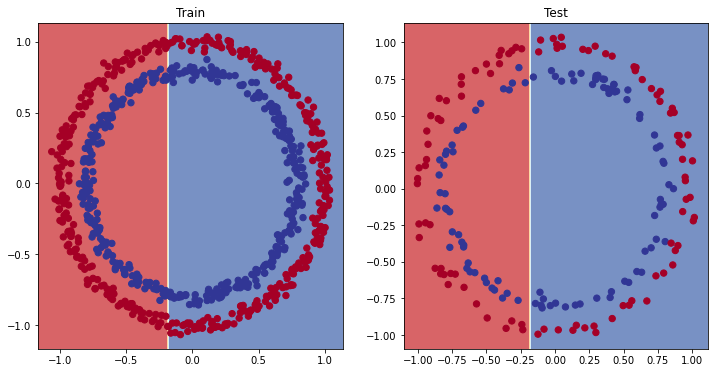

In [43]:
# plot decision boundary for the model
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_0, X_test, y_test)

### Improve Model(from model perspective)
* Add more layers which will give the model more chance to learn about the patterns in the data
* Add more hidden layers-like go from 5 to 10
* Fit for longer
* Change the activation function
* Change the learning rate
* Change the loss function

The above options are all from model perspective because the deal with the model and not the data. 

These paramaters are **hyperparameters** because we are the one who are changing the values

We are trying to improve our model by
* Adding more hidden units 5 -> 10
* Increase the number of layers 2 -> 3
* Increase the number of epochs 100 -> 1000

In [44]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # Here the circle dataset only have 2 features, so in_features =2
    # It is given to a hidden layer of 10 units, so out_features = 10
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)

    # The label of circle dataset is only 1, so out_features=1
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)

    # The above code can be written in a single line
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [45]:
from torch.nn.modules.loss import BCEWithLogitsLoss
# create a loss function
loss_fn = BCEWithLogitsLoss()

# create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [46]:
# create a training and test loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
  # training
  model_1.train()

  #1. forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))#logit -> pred probs -> pred labels


  #2. calculate loss and accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backward propagation
  loss.backward()

  #5. optimizer step(gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # test loss and test accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_accuracy = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # print results
  if epoch % 100 == 0:
    print(f"Epochs : {epoch} | Loss : {loss:0.5f}, Accuracy : {acc:0.2f}% | Test Loss : {test_loss:0.5f}, Test Accuracy : {test_accuracy: 0.2f}%")

Epochs : 0 | Loss : 0.69396, Accuracy : 50.88% | Test Loss : 0.69261, Test Accuracy :  51.00%
Epochs : 100 | Loss : 0.69305, Accuracy : 50.38% | Test Loss : 0.69379, Test Accuracy :  48.00%
Epochs : 200 | Loss : 0.69299, Accuracy : 51.12% | Test Loss : 0.69437, Test Accuracy :  46.00%
Epochs : 300 | Loss : 0.69298, Accuracy : 51.62% | Test Loss : 0.69458, Test Accuracy :  45.00%
Epochs : 400 | Loss : 0.69298, Accuracy : 51.12% | Test Loss : 0.69465, Test Accuracy :  46.00%
Epochs : 500 | Loss : 0.69298, Accuracy : 51.00% | Test Loss : 0.69467, Test Accuracy :  46.00%
Epochs : 600 | Loss : 0.69298, Accuracy : 51.00% | Test Loss : 0.69468, Test Accuracy :  46.00%
Epochs : 700 | Loss : 0.69298, Accuracy : 51.00% | Test Loss : 0.69468, Test Accuracy :  46.00%
Epochs : 800 | Loss : 0.69298, Accuracy : 51.00% | Test Loss : 0.69468, Test Accuracy :  46.00%
Epochs : 900 | Loss : 0.69298, Accuracy : 51.00% | Test Loss : 0.69468, Test Accuracy :  46.00%


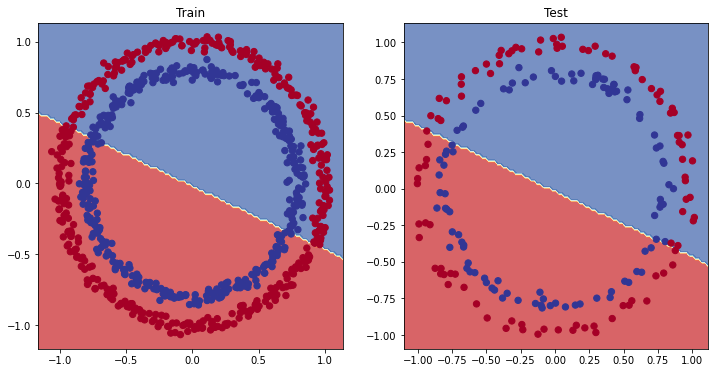

In [47]:
# plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)


### Preparing data to see if model can draw straight line


To troubleshoot a larger problem test on a smaller problem

In [48]:
# create data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [49]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))

80 80 20 20


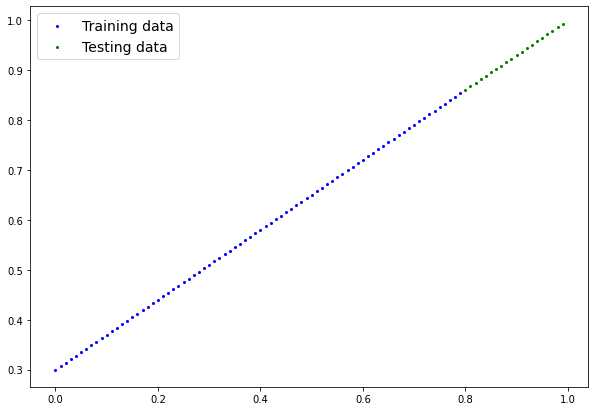

In [50]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
)

In [51]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [52]:
# Loss and Optimizer
loss_fn = nn.L1Loss() # because we are solving regression rather than classification

optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [53]:
# Train the model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

# print results
  if epoch % 100 == 0:
    print(f"Epochs : {epoch} | Loss : {loss:0.5f} | Test Loss : {test_loss:0.5f}")


Epochs : 0 | Loss : 0.75986 | Test Loss : 0.91103
Epochs : 100 | Loss : 0.02858 | Test Loss : 0.00081
Epochs : 200 | Loss : 0.02533 | Test Loss : 0.00209
Epochs : 300 | Loss : 0.02137 | Test Loss : 0.00305
Epochs : 400 | Loss : 0.01964 | Test Loss : 0.00341
Epochs : 500 | Loss : 0.01940 | Test Loss : 0.00387
Epochs : 600 | Loss : 0.01903 | Test Loss : 0.00379
Epochs : 700 | Loss : 0.01878 | Test Loss : 0.00381
Epochs : 800 | Loss : 0.01840 | Test Loss : 0.00329
Epochs : 900 | Loss : 0.01798 | Test Loss : 0.00360


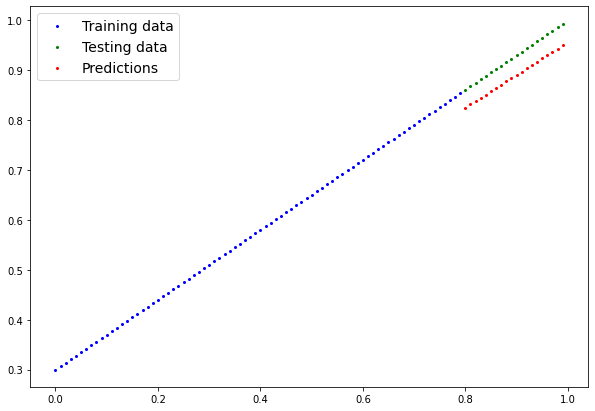

In [54]:
model_2.eval()

# make predictions
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# plot data and predictions
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression, predictions=y_preds
)

**Note:** The  above graph is empty because we are using Matplotlib. Matplotlib works on cpu and deals with numpy rather than tensors.

Now our device is in gpu. So we have to convert it to cpu

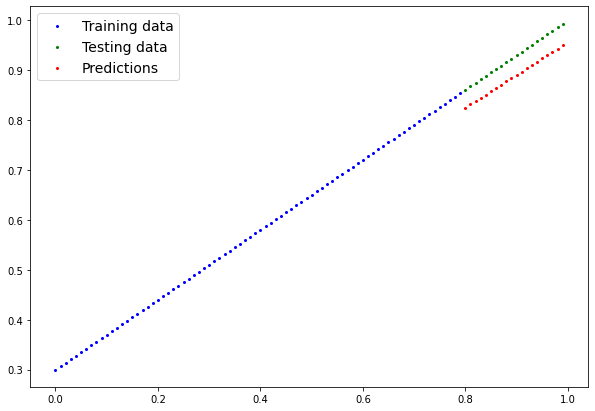

In [55]:
# plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
    train_labels=y_train_regression.cpu(),
    test_data=X_test_regression.cpu(),
    test_labels=y_test_regression.cpu(), predictions=y_preds.cpu()
)

### Non Linearity

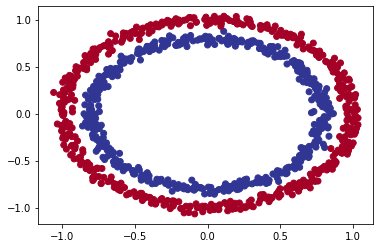

In [56]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [57]:
# convert data to tensors and then to train and test
import torch
from sklearn.model_selection import train_test_split


# Turn data to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split into train and test sets

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]), tensor([1., 0., 0., 0., 1.]))

### Building model with non-linearity

* linear -> Straight line
* non linear -> non straight lines


In [58]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

    # non linear function
    self.relu = nn.ReLU()
  
  def forward(self, x):
    # where should we put non-linear activation functions?

    # Here we are taking the output of layer 1 and passing it to relu function
    # It is then passed to layer 2 and the output of layer 2 is then passed to relu function
    # It is then passed to layer 3. But here the output of the layer 3 is not passed
    # to relu. It will be passed tpo sigmoid

    # Relu will take the output of each layer and turn the negative values to zero
    # and keep the positive values as such
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [59]:
# set optmizer and loss
loss_fn = BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [60]:
# we can use binary classification incase to check if an email is spam or not
# or incase for fraud detection for credit cards
# Insurance claims etc

### Train model with Non-Linearity

In [61]:
# random_seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  ## Training
  model_3.train()

  # Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #logits -> prediction probabilities -> prediction labels

  # calculate loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # Back propogation
  loss.backward()

  # step optimizer
  optimizer.step()

  # Testing
  model_3.eval()

  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # print the result
  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | Train Loss : {loss:.5f}, Train Accuracy : {acc:0.2f}% | Test Loss : {test_loss:0.5f}, Test accuracy : {test_accuracy:0.2f}%")
 

Epoch : 0 | Train Loss : 0.69295, Train Accuracy : 50.00% | Test Loss : 0.69319, Test accuracy : 46.00%
Epoch : 100 | Train Loss : 0.69115, Train Accuracy : 52.88% | Test Loss : 0.69102, Test accuracy : 46.00%
Epoch : 200 | Train Loss : 0.68977, Train Accuracy : 53.37% | Test Loss : 0.68940, Test accuracy : 46.00%
Epoch : 300 | Train Loss : 0.68795, Train Accuracy : 53.00% | Test Loss : 0.68723, Test accuracy : 46.00%
Epoch : 400 | Train Loss : 0.68517, Train Accuracy : 52.75% | Test Loss : 0.68411, Test accuracy : 46.00%
Epoch : 500 | Train Loss : 0.68102, Train Accuracy : 52.75% | Test Loss : 0.67941, Test accuracy : 46.00%
Epoch : 600 | Train Loss : 0.67515, Train Accuracy : 54.50% | Test Loss : 0.67285, Test accuracy : 46.00%
Epoch : 700 | Train Loss : 0.66659, Train Accuracy : 58.38% | Test Loss : 0.66322, Test accuracy : 46.00%
Epoch : 800 | Train Loss : 0.65160, Train Accuracy : 64.00% | Test Loss : 0.64757, Test accuracy : 46.00%
Epoch : 900 | Train Loss : 0.62362, Train Accura

In [62]:
model_3.state_dict()

OrderedDict([('layer_1.weight', tensor([[ 0.6760,  0.8035],
                      [-0.1997,  0.7568],
                      [-0.1549,  0.1427],
                      [-0.9637,  0.2292],
                      [ 0.5717, -1.3426],
                      [ 0.6689,  0.1840],
                      [ 0.7970,  0.2595],
                      [ 0.3410, -0.0998],
                      [ 0.6555,  0.3186],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3761, -0.2008, -0.2872,  0.2803, -0.4513, -0.3364, -0.3300, -0.4252,
                      -0.1989, -0.6984])),
             ('layer_2.weight',
              tensor([[ 1.3081e-01, -3.7347e-01,  2.4414e-01, -4.3348e-02, -2.7270e-01,
                        1.0512e-01, -4.7109e-02,  2.5550e-01, -4.9248e-02, -9.9730e-02],
                      [ 7.9469e-01,  3.8277e-01,  1.3309e-01,  7.5399e-01,  9.7241e-01,
                        2.6996e-01,  6.2185e-01,  5.6581e-02,  5.3486e-01, -1.9274e-01],
      

#### Evaluate model trained with non-linear activation functions

In [63]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

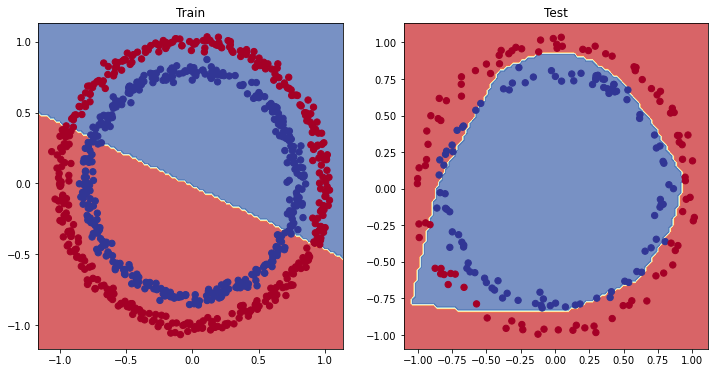

In [64]:
# plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### Replicating non-linear activation functions

Neural network rather than telling the model what to learn, will give the tools to discover the pattern in data and try to figure out the pattern by itself.

These tools are linear and non-linear functions

In [65]:
# create tensor
A = torch.arange(-10, 10, 1)
A

tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4,   5,   6,   7,   8,   9])

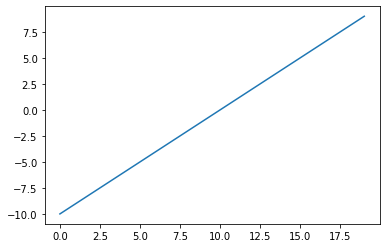

In [66]:
# visualize tensor
plt.plot(A)

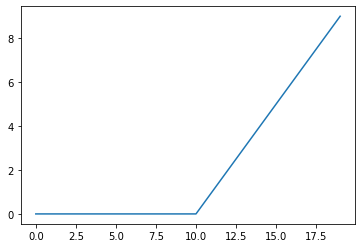

In [67]:
plt.plot(torch.relu(A))

In [70]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.max(torch.tensor(0), x)

In [71]:
# Here the function will take the input tensor and will convert all negatives to
# zero and positive as such.
relu(A)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

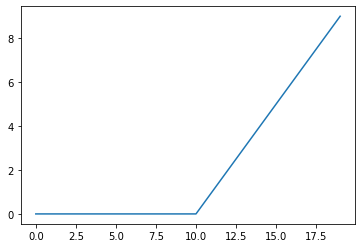

In [72]:
plt.plot(relu(A))

In [73]:
# Sigmoid Function
def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-x))

In [74]:
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

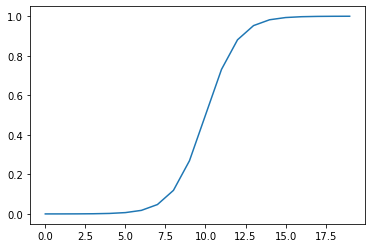

In [75]:
plt.plot(torch.sigmoid(A))

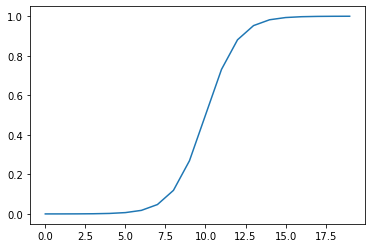

In [76]:
# our custom version
plt.plot(sigmoid(A))